## CSCI-UA 9473 Introduction to Machine Learning 
### Assignment 1: Gradient descent


__Given date:__ Feb 5

__Due date:__ Feb 19

__Total:__ 10pts

### Question 1. (5pts) Local vs global minimas and gradient descent

We consider the following function.

\begin{align}
F(x_1, x_2) =  3(1-x_1)^2\exp(-(x_1^2) - (x_2+1)^2)\\ 
   - 10(x_1/5 - x_1^3 - x_2^5)\exp(-x_1^2-x_2^2)\\
   - (1/3)\exp(-(x_1+1)^2 - x_2^2)
\end{align}

The surface plot of this function is given below together with its contour plot. The function has a single global minimum located near $(0.23, -1.62)$ and shown in red in the contour plot.

We want to implement gradient descent iterations on that function. Starting from a random initial point $(x_1, x_2)$, code the following updates 

\begin{align}
x_1^{(k+1)} = x_1^{(k)} - \eta * \text{grad}_{x_1} F(x_1, x_2)\\
x_2^{(k+1)} = x_2^{(k)} - \eta * \text{grad}_{x_2} F(x_1, x_2)
\end{align}

where $\text{grad}_{x_i}$ represents the gradient of $F(x_1, x_2)$ with respect to $x_i$. Choose a sufficiently small learning rate and plot the iterates (in white) on the contour plot. Repeat your experiments for various initial iterates.  

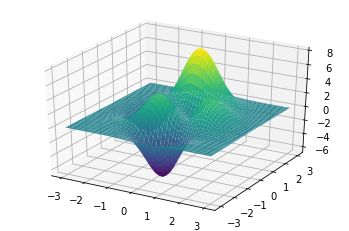

In [1]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
x1, x2 = np.meshgrid(x, y)
F = 3*(1-x1)**2 * np.exp(-(x1**2) - (x2+1)**2)\
   - 10*(np.true_divide(x1,5) - x1**3 - x2**5)*np.exp(-x1**2 - x2**2)\
   - np.true_divide(1,3)*np.exp(-(x1+1)**2 - x2**2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, F, linewidth=0, alpha=1, cmap = 'viridis')
plt.show()



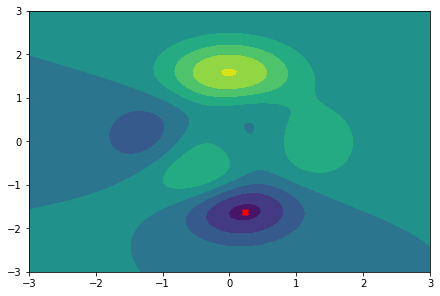

In [2]:
fig1, ax = plt.subplots(constrained_layout=True)
contour = ax.contourf(x1, x2, F,cmap = 'viridis')
plt.scatter(0.23, -1.62,c='r',marker='X')
plt.show()

The minimum found is located at ( -1.3473921326922105 ,  0.20452981307687673 )


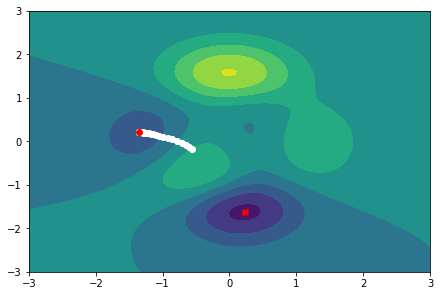



The minimum found is located at ( -1.347378036817932 ,  0.20456793110468155 )


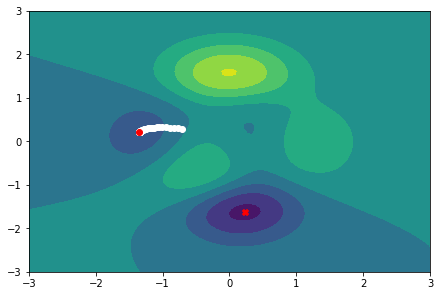



The minimum found is located at ( 0.3086018368384406 ,  0.23523826875238718 )


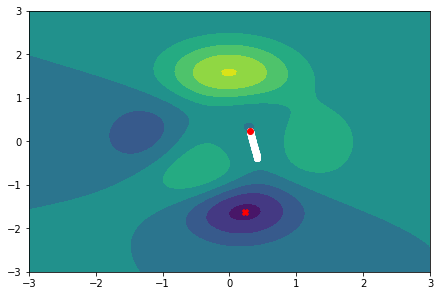



The minimum found is located at ( 0.2964267716099401 ,  0.3203224783227319 )


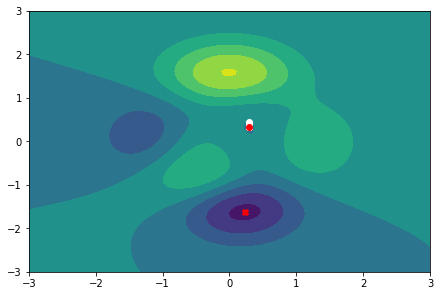



The minimum found is located at ( 0.29659148540672164 ,  0.31921363472684866 )


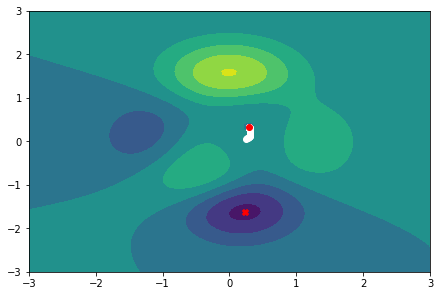



The minimum found is located at ( 0.22827895879779503 ,  -1.6255349443094964 )


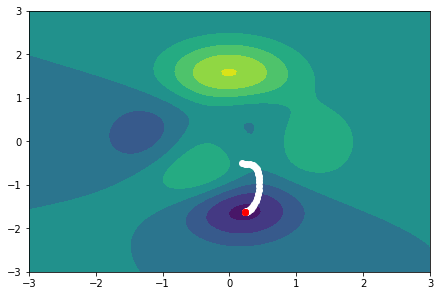



The minimum found is located at ( -1.3471284772111767 ,  0.20523712615472411 )


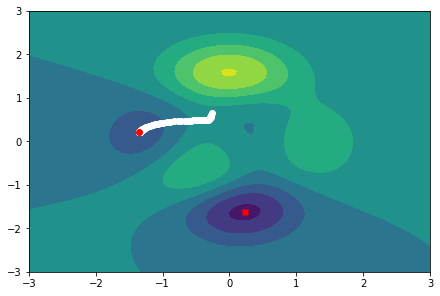



The minimum found is located at ( 0.30013442031159737 ,  0.29481044500810194 )


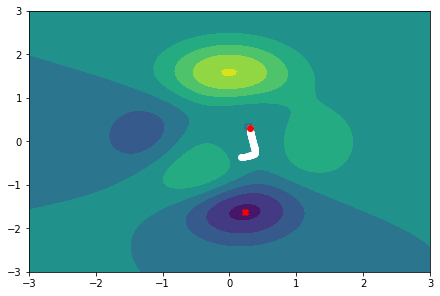



The minimum found is located at ( 0.29653663151349824 ,  0.3195831918231699 )


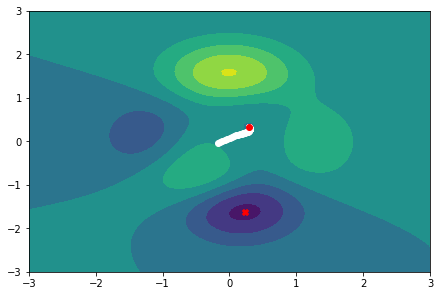



The minimum found is located at ( -1.3473509370302275 ,  0.2046409851311085 )


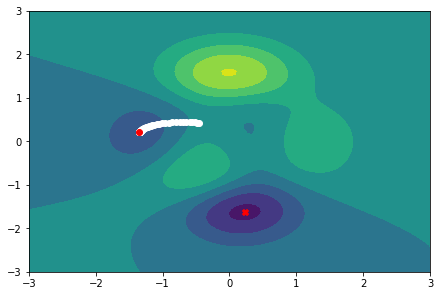

In [6]:
# my solution


# implementation of gradient descent algorithm
def findMinimum(max_iter, eta):
    
    # random initial values for x1 and x2 using the Gaussian distribution
    x1_init = np.random.normal(0,0.5,1)
    x2_init = np.random.normal(0,0.5,1)

    x1 = x1_init 
    x2 = x2_init

    # gradient descent iterations
    for iter in np.arange(0, max_iter):
        
        grad_x1_tmp1 = -6 * (1 - x1) * (1 + (1 - x1) * x1) * np.exp(-(x1**2) - (x2 + 1)**2)
        grad_x1_tmp2 = -10 * np.exp(-(x1**2) - (x2**2)) * (np.true_divide(1,5) - 3 * x1**2 + (np.true_divide(x1, 5) - x1**3 - x2**5) * -2*x1)
        grad_x1_tmp3 = np.true_divide(2,3) * (x1 + 1) * np.exp(-(x1 + 1)**2 - x2**2)   
        
        # grad_x1 is the derivative of F with respect to x1
        grad_x1 = grad_x1_tmp1 + grad_x1_tmp2 + grad_x1_tmp3

        grad_x2_tmp1 = -6 * (1 - x1)**2 * (x2 + 1) * np.exp(-(x1**2) - (x2 + 1)**2)
        grad_x2_tmp2 = 10 * np.exp(-(x1**2) - (x2**2)) * (5*(x2**4) + 2*x2*(np.true_divide(x1,5) - x1**3 - x2**5))
        grad_x2_tmp3 = np.true_divide(2, 3) * x2 * np.exp(-(x1 + 1)**2 - x2**2)
        
        # grad_x2 is the derivative of F with respect to x2
        grad_x2 = grad_x2_tmp1 + grad_x2_tmp2 + grad_x2_tmp3
        
        # update x1 and x2
        x1 = x1 - eta * grad_x1
        x2 = x2 - eta * grad_x2
        plt.scatter(x1, x2, c='w')
    
    plt.scatter(x1, x2, c='r')  
    return x1[0], x2[0]


# maximum number of iterations for the main for loop
max_iter = 100

# learning rate
eta = 0.01
               
for iter in np.arange(0, 10):
    
    # make data
    x = np.linspace(-3, 3, 100)
    y = np.linspace(-3, 3, 100)
    x1, x2 = np.meshgrid(x, y)
    F = 3*(1-x1)**2 * np.exp(-(x1**2) - (x2+1)**2)\
        - 10*(np.true_divide(x1,5) - x1**3 - x2**5)*np.exp(-x1**2 - x2**2)\
        - np.true_divide(1,3)*np.exp(-(x1+1)**2 - x2**2)
    
    # the contour plot
    fig1, ax = plt.subplots(constrained_layout=True)
    contour = ax.contourf(x1, x2, F,cmap = 'viridis')
    
    # find the minimum (which can be local or global depending on x1_init and x2_init)
    x1, x2 = findMinimum(max_iter, eta)

    # print the coordinates of the minimum
    print("The minimum found is located at (",x1, ", ", x2, ")")
    
    # plot the result
    plt.scatter(0.23, -1.62,c='r',marker='X')
    plt.show()
    print("\n")


### Question 2. (5pts) Regression through the normal equations 

We consider the simple regression problem below, similar to the one discussed in class. 
Find the model that minimizes the sum of squares loss

\begin{align}
\ell(\boldsymbol \beta) = \frac{1}{2N}\sum_{i=1}^N (t_{\text{noisy}}^{(i)} -  (\beta_0 +\beta_1 x^{(i)}))^2
\end{align}

__using the Normal Equations__. To do this:

- Start by building the matrix $\tilde{\boldsymbol X}$ with
\begin{align}
\tilde{\boldsymbol X} = \left[\begin{array}{cc}
1 & x^{(1)} \\
\vdots & \vdots \\
1 & x^{(N)} \end{array}\right]
\end{align}
- Then compute the matrix $\tilde{\boldsymbol X}^T\tilde{\boldsymbol X}$ and the vector $\tilde{\boldsymbol X}^T\boldsymbol t$ where $\boldsymbol t = [t_{\text{noisy}}^{(1)}, \ldots , t^{(N)}_{\text{noisy}}]^T$

- Finally solve the equations through

\begin{align}
\boldsymbol \beta_{\text{OLS}} = \left(\tilde{\boldsymbol X}^T\tilde{\boldsymbol X}\right)^{-1}(\tilde{\boldsymbol X}^T\boldsymbol t) 
\end{align}

using the function __np.linalg.inv__ from the linear algebra package. Plot the result in green on top of the plot below and compare with the true (blue) (unknown) model.  


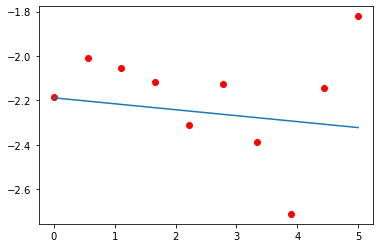

The initial values for the matrix beta were [beta1 beta0] =  [-2.18833839 -0.02677817]
The values found by the model are [beta1 beta0] =  [-2.14381853 -0.01704743]


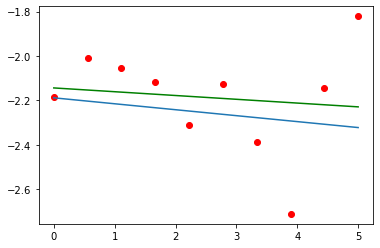

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,5,10)

noise = np.random.normal(0,.3,len(x))
beta_true = np.random.normal(0,1,2)

t = beta_true[0] + beta_true[1]*x

tnoisy = t + noise

plt.scatter(x, tnoisy, c='r')
plt.plot(x, t)
plt.show()

# my solution

# 1) Build the matrix  𝑋̃
x_tilde = np.hstack((np.ones((len(x), 1)), x.reshape(-1,1)))

# 2) Compute the matrix  𝑋̃𝑇𝑋̃ (tmp1) and the vector  𝑋̃T (tmp2) where T = tnoisy.T 
tmp1 = np.dot(x_tilde.T, x_tilde)
tmp2 = np.dot(x_tilde.T, tnoisy.T)

# 3) Solve the equation
betaOLS = np.dot(np.linalg.inv(tmp1), tmp2)
print("The initial values for the matrix beta were [beta1 beta0] = ", beta_true)
print("The values found by the model are [beta1 beta0] = ", betaOLS)

# generate new data to plot the prodiction
x_prediction = np.linspace(0, 5, num = 50)
x_prediction_tilde = np.hstack((np.ones((len(x_prediction), 1)), x_prediction.reshape(-1,1)))

# find the impage of the x_prediction points with the new model betaOLS
targets_prediction = np.dot(betaOLS, x_prediction_tilde.T)

# plot the result
plt.scatter(x, tnoisy, c='r')
plt.plot(x, t)
plt.plot(x_prediction, targets_prediction, c='g')
plt.show()